In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.5.1+cu124'

In [ ]:
weight=0.6
bias=0.2
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
Y=weight*X+bias
print(Y[:5])

tensor([[0.2000],
        [0.2120],
        [0.2240],
        [0.2360],
        [0.2480]])


In [ ]:
train_split=int(0.8*len(Y))
X_train,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]
print((X_train),(Y_train))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]]) tensor([[0.2000],
        [0.2120],
        [0.2240],
        [0.2360],
        [0.2480],
        [0.2600],
        [0.2720],
        [0.2840],
        [0.2960],
        [0.3080],
        [0.3200],
        [0.3320],
        [0.3440],
        [0.3560],
        [0.3680],
        [

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias

In [ ]:
torch.manual_seed(42)
#create an instance of the model(this is a subclass of nn.Module)
model_0=LinearRegressionModel()
#checking the parameters
list(model_0.parameters())
epoch_count=[]
training_loss_values=[]
testing_loss_values=[]

In [ ]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

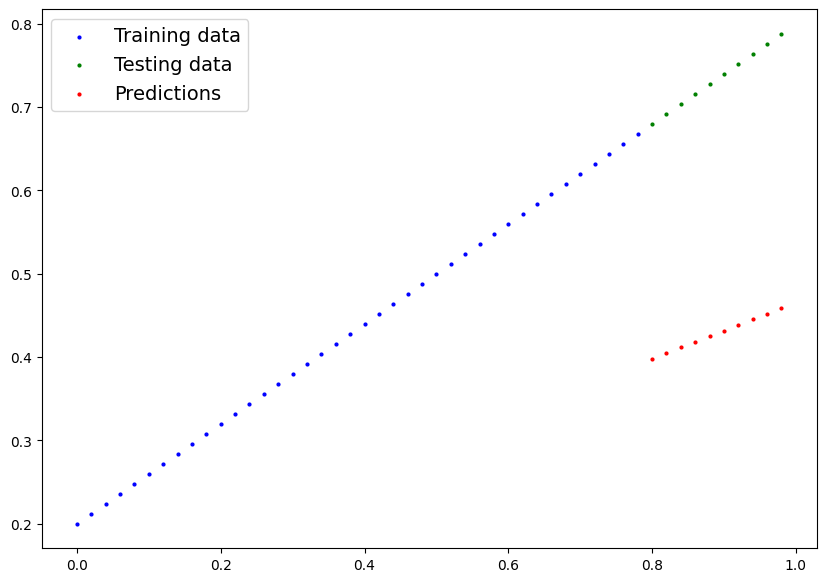

In [ ]:
with torch.inference_mode():
  y_predict=model_0(X_test)
y_predict
plot_predictions(predictions=y_predict)

In [ ]:

#seeting up loss function
loss_fn=torch.nn.L1Loss()
#setting up optimizer (stochastic gradient descent(SGD))
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.001)#lr -> learning rate is the rate at which the model learns


In [ ]:
epochs = 2000

for epoch in range(epochs):
  #0
  model_0.train()
  #1
  Y_preds=model_0(X_train)
  #2
  loss=loss_fn(Y_preds,Y_train)
  #3
  optimizer.zero_grad()
  #4
  loss.backward()
  #5
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_prediction=model_0(X_test)
    test_loss=loss_fn(test_prediction,Y_test)
  if(epoch%10==0):
    epoch_count.append(epoch)
    training_loss_values.append(loss)
    testing_loss_values.append(test_loss)
    print(f"epoch: {epoch}, training loss : {loss}, testing loss : {test_loss}")
    print(model_0.state_dict())


epoch: 0, training loss : 0.17388135194778442, testing loss : 0.30418911576271057
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
epoch: 10, training loss : 0.16236037015914917, testing loss : 0.290718138217926
OrderedDict([('weights', tensor([0.3410])), ('bias', tensor([0.1398]))])
epoch: 20, training loss : 0.15083935856819153, testing loss : 0.2772471606731415
OrderedDict([('weights', tensor([0.3449])), ('bias', tensor([0.1498]))])
epoch: 30, training loss : 0.13931839168071747, testing loss : 0.2637762129306793
OrderedDict([('weights', tensor([0.3488])), ('bias', tensor([0.1598]))])
epoch: 40, training loss : 0.12779739499092102, testing loss : 0.2503052353858948
OrderedDict([('weights', tensor([0.3527])), ('bias', tensor([0.1698]))])
epoch: 50, training loss : 0.11627638339996338, testing loss : 0.23683428764343262
OrderedDict([('weights', tensor([0.3566])), ('bias', tensor([0.1798]))])
epoch: 60, training loss : 0.10475540161132812, testing loss : 0.22336

(None, None)

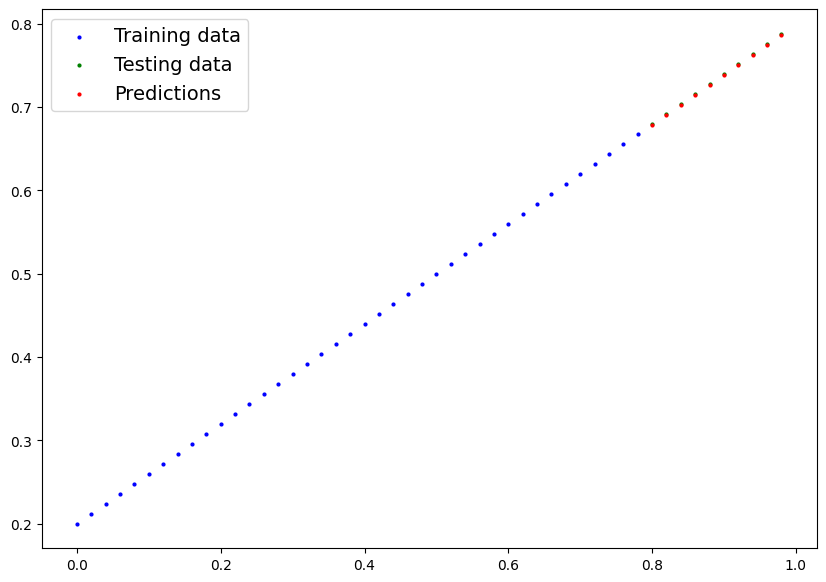

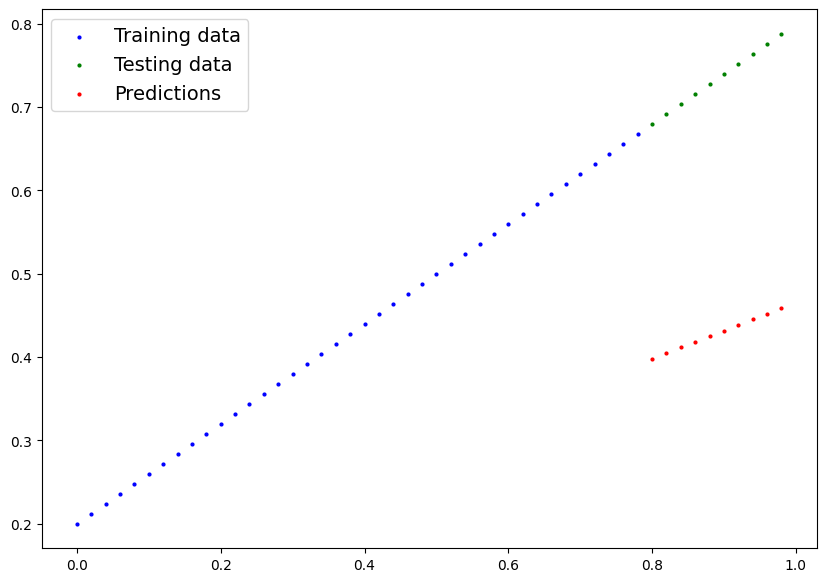

In [ ]:
plot_predictions(predictions=test_prediction),plot_predictions(predictions=y_predict)

In [ ]:
print(epoch_count,
training_loss_values,
testing_loss_values)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 

In [ ]:
test_prediction

tensor([[0.6787],
        [0.6907],
        [0.7027],
        [0.7147],
        [0.7266],
        [0.7386],
        [0.7506],
        [0.7626],
        [0.7746],
        [0.7865]])

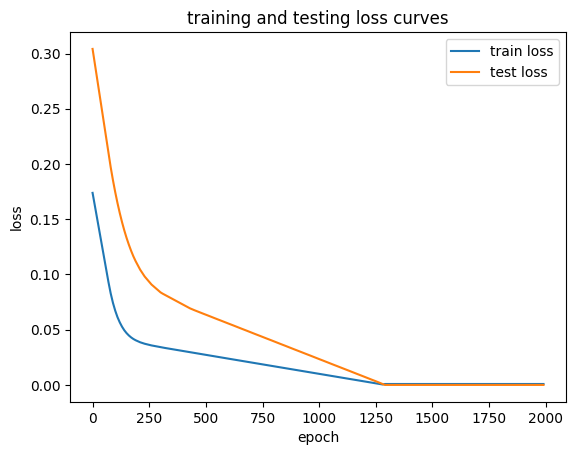

In [ ]:
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(training_loss_values).numpy()),label="train loss")
plt.plot(epoch_count,np.array(torch.tensor(testing_loss_values).numpy()),label="test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("training and testing loss curves")
plt.legend()

In [ ]:
print(type(testing_loss_values))

<class 'list'>


In [ ]:
from pathlib import Path
model_path=Path("model")
model_path.mkdir(exist_ok=True,parents=True)
model_save_path=model_path / "LinearRegression_model_0.pth"
model_save_path


PosixPath('model/LinearRegression_model_0.pth')

In [ ]:
torch.save(obj=model_0.state_dict(),f=model_save_path)

In [ ]:
!ls -1 model

LinearRegression_model_0.pth


In [ ]:
loaded_model_0=LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [ ]:
loaded_model_0.load_state_dict(torch.load(f=model_save_path))

<ipython-input-26-d60057a93fe5>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5990])), ('bias', tensor([0.1995]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5990])), ('bias', tensor([0.1995]))])